In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import itertools
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import sklearn as skl
import scipy.stats as spst
import sklearn.metrics as skmr
import xgboost as xgb
from tabpfn import TabPFNClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from tabpfn.preprocessing import PreprocessorConfig
from tabpfn.constants import ModelInterfaceConfig
from sklearn.preprocessing import LabelEncoder

In [27]:
Ds = list(range(3, 11))
le = LabelEncoder()
method_infos = [
    #("XGBoost", xgb.XGBClassifier()),
    ("TabPFN-v2 (k=1, w/ fingerprint)", TabPFNClassifier(device='cpu', n_estimators=1, inference_config=ModelInterfaceConfig(FINGERPRINT_FEATURE=True))),
    ("TabPFN-v2 (k=4, w/ fingerprint)", TabPFNClassifier(device='cpu', n_estimators=4, inference_config=ModelInterfaceConfig(FINGERPRINT_FEATURE=True))),
    ("TabPFN-v2 (k=16, w/ fingerprint)", TabPFNClassifier(device='cpu', n_estimators=16, inference_config=ModelInterfaceConfig(FINGERPRINT_FEATURE=True))),
    ("TabPFN-v2 (k=1, w/o fingerprint)", TabPFNClassifier(device='cpu', n_estimators=1, inference_config=ModelInterfaceConfig(FINGERPRINT_FEATURE=False))),
    ("TabPFN-v2 (k=4, w/o fingerprint)", TabPFNClassifier(device='cpu', n_estimators=4, inference_config=ModelInterfaceConfig(FINGERPRINT_FEATURE=False))),
    ("TabPFN-v2 (k=16, w/o fingerprint)", TabPFNClassifier(device='cpu', n_estimators=16, inference_config=ModelInterfaceConfig(FINGERPRINT_FEATURE=False))),
]
STYLE = ['^-', 'o-', 'x-', '^:', 'o:', 'x:']
method_infos = [
    ("XGBoost", xgb.XGBClassifier()),
    ("TabPFN-v2 (k=1)", TabPFNClassifier(device='cpu', n_estimators=1)),
    ("TabPFN-v2 (k=4)", TabPFNClassifier(device='cpu', n_estimators=4)),
    ("TabPFN-v2 (k=16)", TabPFNClassifier(device='cpu', n_estimators=16)),
]
STYLE = ['s-', '^-', 'o-', 'x-']

In [3]:
results_dict = {mname : {} for mname, _ in method_infos} 
pvalues_dict = {mname : {} for mname, _ in method_infos} 
for D in Ds:
    X = np.array(list(itertools.product([False, True], repeat=D))).astype(int)
    N = X.shape[0]
    y = np.sum(X, axis=1) % 2
    for mname, method in method_infos:
        y_test_agg = []
        y_test_pred_agg = []
        for n in range(N):
            X_train = np.r_[X[0:n, :], X[n+1:, :]]
            y_train = np.r_[y[0:n], y[n+1:]]
            rng = check_random_state(n)
            train_ixs = rng.choice(N - 1, size=N - 1, replace=False)  # shuffle
            X_train = X_train[train_ixs, :]
            y_train = y_train[train_ixs]
            X_test = X[n:n+1, :]
            y_test = y[n:n+1]
            method.fit(X_train, y_train)
            y_test_pred = method.predict(X_test)
            y_test_agg.append(y_test)
            y_test_pred_agg.append(y_test_pred)
        y_test_agg = np.concatenate(y_test_agg)
        y_test_pred_agg = np.concatenate(y_test_pred_agg)
        is_correct = (y_test_agg == y_test_pred_agg)
        acc = np.mean(is_correct)
        print(D, mname, acc)
        results_dict[mname][D] = acc
        pvalues_dict[mname][D] = spst.binomtest(k=np.sum(is_correct), n=N, p=0.5, alternative='greater').pvalue

3 XGBoost 0.0


/home/calvin/.conda/envs/tabpfn2/lib/python3.9/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


3 TabPFN-v2 (k=1) 0.0
3 TabPFN-v2 (k=4) 0.0
3 TabPFN-v2 (k=16) 0.0
4 XGBoost 0.0
4 TabPFN-v2 (k=1) 0.0625
4 TabPFN-v2 (k=4) 1.0
4 TabPFN-v2 (k=16) 1.0
5 XGBoost 0.0
5 TabPFN-v2 (k=1) 0.03125
5 TabPFN-v2 (k=4) 0.9375
5 TabPFN-v2 (k=16) 0.9375
6 XGBoost 0.0
6 TabPFN-v2 (k=1) 0.0625
6 TabPFN-v2 (k=4) 0.96875
6 TabPFN-v2 (k=16) 0.984375
7 XGBoost 0.0
7 TabPFN-v2 (k=1) 0.40625
7 TabPFN-v2 (k=4) 0.984375
7 TabPFN-v2 (k=16) 0.984375
8 XGBoost 0.0
8 TabPFN-v2 (k=1) 0.27734375
8 TabPFN-v2 (k=4) 0.9921875
8 TabPFN-v2 (k=16) 0.9921875
9 XGBoost 0.0
9 TabPFN-v2 (k=1) 0.45703125
9 TabPFN-v2 (k=4) 0.99609375
9 TabPFN-v2 (k=16) 0.99609375
10 XGBoost 0.0
10 TabPFN-v2 (k=1) 0.490234375
10 TabPFN-v2 (k=4) 0.998046875
10 TabPFN-v2 (k=16) 0.998046875


,XGBoost,TabPFN-v2 (k=1),TabPFN-v2 (k=4),TabPFN-v2 (k=16)
3,0.0,0.000000,0.000000,0.000000
4,0.0,0.062500,1.000000,1.000000
5,0.0,0.031250,0.937500,0.937500
6,0.0,0.062500,0.968750,0.984375
7,0.0,0.406250,0.984375,0.984375
8,0.0,0.277344,0.992188,0.992188
9,0.0,0.457031,0.996094,0.996094
10,0.0,0.490234,0.998047,0.998047


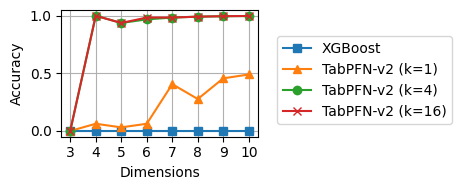

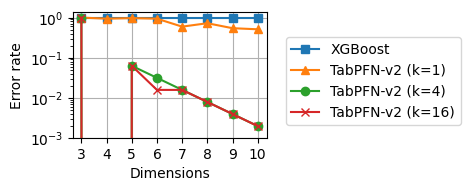

In [40]:
display(pd.DataFrame(results_dict))

ax = pd.DataFrame(results_dict).plot(figsize=(5, 2),style=STYLE)
ax.set_xticks(Ds)
#pd.DataFrame(results_dict).plot.bar(rot=0, ax=ax)
plt.xlabel('Dimensions');
plt.ylabel('Accuracy');
sns.move_legend(obj=ax, loc=(1.1,0.1));
plt.tight_layout();
plt.savefig('parity-Nminus1.pdf')
plt.grid(True)

ax = (1-pd.DataFrame(results_dict)).plot(figsize=(5,2), style=STYLE)
ax.set_xticks(Ds)
#pd.DataFrame(results_dict).plot.bar(rot=0, ax=ax)
plt.xlabel('Dimensions');
plt.ylabel('Error rate');
plt.yscale('log');
sns.move_legend(obj=ax, loc=(1.1,0.1));
plt.yticks([1e-3, 1e-2, 1e-1, 1]);
plt.tight_layout();
plt.savefig('parity-error-Nminus1.pdf')
plt.grid(True)

In [31]:
halfresults_dict = {mname : {} for mname, _ in method_infos} 
for D in Ds:
    X = np.array(list(itertools.product([False, True], repeat=D))).astype(int)
    N = X.shape[0]
    y = np.sum(X, axis=1) % 2
    for mname, method in method_infos:
        y_test_agg = []
        y_test_pred_agg = []
        for n in range(N):
            X_train = np.r_[X[0:n, :], X[n+1:, :]]
            y_train = np.r_[y[0:n], y[n+1:]]
            rng = check_random_state(n)
            train_ixs = rng.choice(N - 1, size=N // 2, replace=False)
            X_train = X_train[train_ixs, :]
            y_train = y_train[train_ixs]
            X_test = X[n:n+1, :]
            y_test = y[n:n+1]
            if np.unique(y_train).shape[0] == 1:
                y_test_pred = np.full_like(y_test, fill_value=np.unique(y_train)[0])
            else:
                method.fit(X_train, y_train)
                y_test_pred = method.predict(X_test)
            y_test_agg.append(y_test)
            y_test_pred_agg.append(y_test_pred)
        y_test_agg = np.concatenate(y_test_agg)
        y_test_pred_agg = np.concatenate(y_test_pred_agg)
        acc = np.mean(y_test_agg == y_test_pred_agg)
        print(D, mname, acc)
        halfresults_dict[mname][D] = acc

3 XGBoost 0.25
3 TabPFN-v2 (k=1) 0.0
3 TabPFN-v2 (k=4) 0.125
3 TabPFN-v2 (k=16) 0.125
4 XGBoost 0.1875
4 TabPFN-v2 (k=1) 0.25
4 TabPFN-v2 (k=4) 0.375
4 TabPFN-v2 (k=16) 0.25
5 XGBoost 0.46875
5 TabPFN-v2 (k=1) 0.46875
5 TabPFN-v2 (k=4) 0.8125
5 TabPFN-v2 (k=16) 0.84375
6 XGBoost 0.28125
6 TabPFN-v2 (k=1) 0.515625
6 TabPFN-v2 (k=4) 0.96875
6 TabPFN-v2 (k=16) 0.96875
7 XGBoost 0.2265625
7 TabPFN-v2 (k=1) 0.5078125
7 TabPFN-v2 (k=4) 0.984375
7 TabPFN-v2 (k=16) 0.984375
8 XGBoost 0.203125
8 TabPFN-v2 (k=1) 0.4296875
8 TabPFN-v2 (k=4) 0.9921875
8 TabPFN-v2 (k=16) 0.98828125
9 XGBoost 0.236328125
9 TabPFN-v2 (k=1) 0.501953125
9 TabPFN-v2 (k=4) 0.99609375
9 TabPFN-v2 (k=16) 0.99609375
10 XGBoost 0.234375
10 TabPFN-v2 (k=1) 0.4794921875
10 TabPFN-v2 (k=4) 0.998046875
10 TabPFN-v2 (k=16) 0.998046875


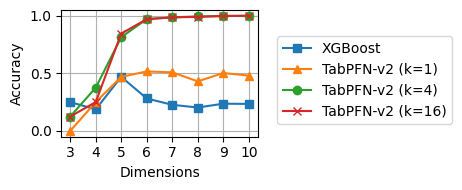

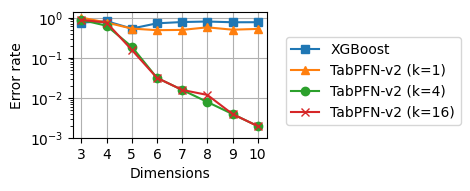

In [39]:
ax = pd.DataFrame(halfresults_dict).plot(figsize=(5, 2),style=STYLE)
ax.set_xticks(Ds)
#pd.DataFrame(results_dict).plot.bar(rot=0, ax=ax)
plt.xlabel('Dimensions');
plt.ylabel('Accuracy');
sns.move_legend(obj=ax, loc=(1.1,0.1));
plt.tight_layout();
plt.savefig('parity-half.pdf')
plt.grid(True)

ax = (1-pd.DataFrame(halfresults_dict)).plot(figsize=(5,2), style=STYLE)
ax.set_xticks(Ds)
#pd.DataFrame(results_dict).plot.bar(rot=0, ax=ax)
plt.xlabel('Dimensions');
plt.ylabel('Error rate');
plt.yscale('log');
sns.move_legend(obj=ax, loc=(1.1,0.1));
plt.yticks([1e-3, 1e-2, 1e-1, 1]);
plt.tight_layout();
plt.savefig('parity-error-half.pdf')
plt.grid(True)

In [33]:
quarterresults_dict = {mname : {} for mname, _ in method_infos} 
for D in Ds:
    X = np.array(list(itertools.product([False, True], repeat=D))).astype(int)
    N = X.shape[0]
    y = np.sum(X, axis=1) % 2
    for mname, method in method_infos:
        y_test_agg = []
        y_test_pred_agg = []
        for n in range(N):
            X_train = np.r_[X[0:n, :], X[n+1:, :]]
            y_train = np.r_[y[0:n], y[n+1:]]
            rng = check_random_state(n)
            train_ixs = rng.choice(N - 1, size=N // 4, replace=False)
            X_train = X_train[train_ixs, :]
            y_train = y_train[train_ixs]
            X_test = X[n:n+1, :]
            y_test = y[n:n+1]
            if np.unique(y_train).shape[0] == 1:
                y_test_pred = np.full_like(y_test, fill_value=np.unique(y_train)[0])
            else:
                method.fit(X_train, y_train)
                y_test_pred = method.predict(X_test)
            y_test_agg.append(y_test)
            y_test_pred_agg.append(y_test_pred)
        y_test_agg = np.concatenate(y_test_agg)
        y_test_pred_agg = np.concatenate(y_test_pred_agg)
        acc = np.mean(y_test_agg == y_test_pred_agg)
        print(D, mname, acc)
        quarterresults_dict[mname][D] = acc

3 XGBoost 0.375
3 TabPFN-v2 (k=1) 0.375
3 TabPFN-v2 (k=4) 0.25
3 TabPFN-v2 (k=16) 0.25
4 XGBoost 0.25
4 TabPFN-v2 (k=1) 0.375
4 TabPFN-v2 (k=4) 0.4375
4 TabPFN-v2 (k=16) 0.375
5 XGBoost 0.4375
5 TabPFN-v2 (k=1) 0.40625
5 TabPFN-v2 (k=4) 0.53125
5 TabPFN-v2 (k=16) 0.5
6 XGBoost 0.390625
6 TabPFN-v2 (k=1) 0.375
6 TabPFN-v2 (k=4) 0.546875
6 TabPFN-v2 (k=16) 0.609375
7 XGBoost 0.296875
7 TabPFN-v2 (k=1) 0.5
7 TabPFN-v2 (k=4) 0.8828125
7 TabPFN-v2 (k=16) 0.8984375
8 XGBoost 0.3515625
8 TabPFN-v2 (k=1) 0.47265625
8 TabPFN-v2 (k=4) 0.9765625
8 TabPFN-v2 (k=16) 0.9765625
9 XGBoost 0.3984375
9 TabPFN-v2 (k=1) 0.4765625
9 TabPFN-v2 (k=4) 0.99609375
9 TabPFN-v2 (k=16) 0.994140625
10 XGBoost 0.373046875
10 TabPFN-v2 (k=1) 0.5107421875
10 TabPFN-v2 (k=4) 0.99609375
10 TabPFN-v2 (k=16) 0.99609375


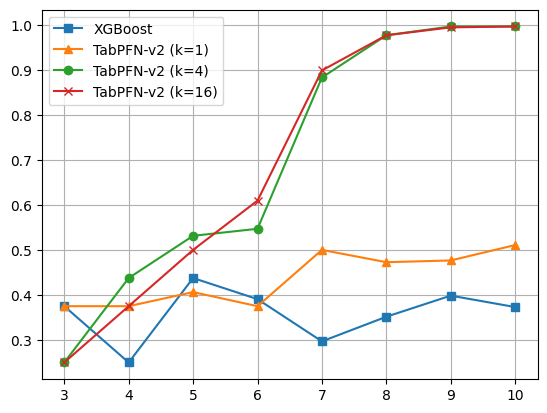

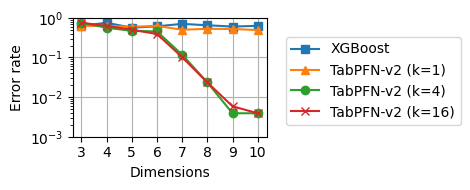

In [38]:
ax = pd.DataFrame(quarterresults_dict).plot(style=STYLE)
ax.set_xticks(Ds)
plt.savefig('parity-quarter.pdf')
plt.grid(True)

ax = (1-pd.DataFrame(quarterresults_dict)).plot(figsize=(5,2), style=STYLE)
ax.set_xticks(Ds)
#pd.DataFrame(results_dict).plot.bar(rot=0, ax=ax)
plt.xlabel('Dimensions');
plt.ylabel('Error rate');
plt.yscale('log');
sns.move_legend(obj=ax, loc=(1.1,0.1));
plt.yticks([1e-3, 1e-2, 1e-1, 1]);
plt.tight_layout();
plt.savefig('parity-error-quarter.pdf')
plt.grid(True)

In [34]:
constantresults_dict = {mname : {} for mname, _ in method_infos} 
for D in list(range(7, 11)):
    X = np.array(list(itertools.product([False, True], repeat=D))).astype(int)
    N = X.shape[0]
    y = np.sum(X, axis=1) % 2
    for mname, method in method_infos:
        y_test_agg = []
        y_test_pred_agg = []
        for n in range(N):
            X_train = np.r_[X[0:n, :], X[n+1:, :]]
            y_train = np.r_[y[0:n], y[n+1:]]
            rng = check_random_state(n)
            train_ixs = rng.choice(N - 1, size=2 ** 7 - 1, replace=False)
            X_train = X_train[train_ixs, :]
            y_train = y_train[train_ixs]
            X_test = X[n:n+1, :]
            y_test = y[n:n+1]
            if np.unique(y_train).shape[0] == 1:
                y_test_pred = np.full_like(y_test, fill_value=np.unique(y_train)[0])
            else:
                method.fit(X_train, y_train)
                y_test_pred = method.predict(X_test)
            y_test_agg.append(y_test)
            y_test_pred_agg.append(y_test_pred)
        y_test_agg = np.concatenate(y_test_agg)
        y_test_pred_agg = np.concatenate(y_test_pred_agg)
        acc = np.mean(y_test_agg == y_test_pred_agg)
        print(D, mname, acc)
        constantresults_dict[mname][D] = acc

7 XGBoost 0.0
7 TabPFN-v2 (k=1) 0.40625
7 TabPFN-v2 (k=4) 0.984375
7 TabPFN-v2 (k=16) 0.984375
8 XGBoost 0.21484375
8 TabPFN-v2 (k=1) 0.4453125
8 TabPFN-v2 (k=4) 0.98828125
8 TabPFN-v2 (k=16) 0.98828125
9 XGBoost 0.40234375
9 TabPFN-v2 (k=1) 0.48828125
9 TabPFN-v2 (k=4) 0.99609375
9 TabPFN-v2 (k=16) 0.994140625
10 XGBoost 0.42578125
10 TabPFN-v2 (k=1) 0.4970703125
10 TabPFN-v2 (k=4) 0.9921875
10 TabPFN-v2 (k=16) 0.9921875


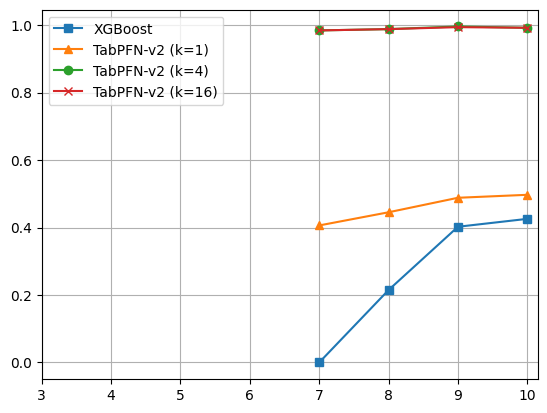

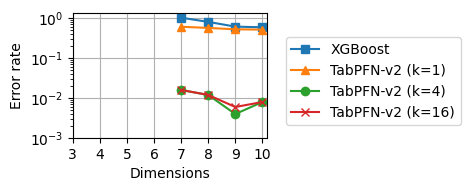

In [41]:
ax = pd.DataFrame(constantresults_dict).plot(style=STYLE)
ax.set_xticks(Ds)
plt.savefig('parity-constant.pdf')
plt.grid(True)

ax = (1-pd.DataFrame(constantresults_dict)).plot(figsize=(5,2), style=STYLE)
ax.set_xticks(Ds)
#pd.DataFrame(results_dict).plot.bar(rot=0, ax=ax)
plt.xlabel('Dimensions');
plt.ylabel('Error rate');
plt.yscale('log');
sns.move_legend(obj=ax, loc=(1.1,0.1));
plt.yticks([1e-3, 1e-2, 1e-1, 1]);
plt.tight_layout();
plt.savefig('parity-error-constant.pdf')
plt.grid(True)

In [42]:
constantresults2_dict = {mname : {} for mname, _ in method_infos} 
for D in list(range(7, 15)):
    X = np.array(list(itertools.product([False, True], repeat=D))).astype(int)
    N = X.shape[0]
    y = np.sum(X, axis=1) % 2
    for mname, method in method_infos:
        y_test_agg = []
        y_test_pred_agg = []
        for n in range(N):
            X_train = np.r_[X[0:n, :], X[n+1:, :]]
            y_train = np.r_[y[0:n], y[n+1:]]
            rng = check_random_state(n)
            train_ixs = rng.choice(N - 1, size=2 ** 7 - 1, replace=False)
            X_train = X_train[train_ixs, :]
            y_train = y_train[train_ixs]
            X_test = X[n:n+1, :]
            y_test = y[n:n+1]
            if np.unique(y_train).shape[0] == 1:
                y_test_pred = np.full_like(y_test, fill_value=np.unique(y_train)[0])
            else:
                method.fit(X_train, y_train)
                y_test_pred = method.predict(X_test)
            y_test_agg.append(y_test)
            y_test_pred_agg.append(y_test_pred)
        y_test_agg = np.concatenate(y_test_agg)
        y_test_pred_agg = np.concatenate(y_test_pred_agg)
        acc = np.mean(y_test_agg == y_test_pred_agg)
        print(D, mname, acc)
        constantresults2_dict[mname][D] = acc

7 XGBoost 0.0
7 TabPFN-v2 (k=1) 0.40625
7 TabPFN-v2 (k=4) 0.984375
7 TabPFN-v2 (k=16) 0.984375
8 XGBoost 0.21484375
8 TabPFN-v2 (k=1) 0.4453125
8 TabPFN-v2 (k=4) 0.98828125
8 TabPFN-v2 (k=16) 0.98828125
9 XGBoost 0.40234375
9 TabPFN-v2 (k=1) 0.48828125
9 TabPFN-v2 (k=4) 0.99609375
9 TabPFN-v2 (k=16) 0.994140625
10 XGBoost 0.42578125
10 TabPFN-v2 (k=1) 0.4970703125
10 TabPFN-v2 (k=4) 0.9921875
10 TabPFN-v2 (k=16) 0.9921875
11 XGBoost 0.466796875
11 TabPFN-v2 (k=1) 0.4921875
11 TabPFN-v2 (k=4) 0.9912109375


KeyboardInterrupt: 

In [ ]:
m